<a href="https://colab.research.google.com/github/cuteGW/project_Lovely-G.4_none/blob/main/%EC%BA%90%EA%B8%80_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%B5%9C%EC%A2%85%EB%B3%B8%5B%EA%B7%9C%EC%99%84%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 모든 열을 출력한다.

# 기본 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
from matplotlib import rc

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/test.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/sample_submission.csv')

print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


# **결측값**

In [3]:
# 결측치가 과하게 많은 행은 제거!
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

## **기존안 (중앙값 및 최빈값)**

In [4]:
# 수치형 변수 결측값 중앙값으로 대체!
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

# 문자형 변수 결측값 최빈값으로 대체!
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [5]:
# 수치형 변수 결측값 중앙값으로 대체!
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median())
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median())
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].median())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].median())
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].median())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median())

# 문자형 변수 결측값 최빈값으로 대체!
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

## **변경안 (None 및 0+여러가지 혼합)**

In [ ]:
noneColumns=['MasVnrType','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in noneColumns:
    train_df[i].fillna('None',inplace=True)
    test_df[i].fillna('None',inplace=True)

  # 'Alley','PoolQC','Fence','MiscFeature'

In [ ]:
zeroColumns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea','GarageYrBlt', 'GarageArea', 'GarageCars']
for i in zeroColumns:
    train_df[i].fillna(0,inplace=True)
    test_df[i].fillna(0,inplace=True)

In [ ]:
modeColumns=['Exterior1st','Exterior2nd','KitchenQual','SaleType','Electrical']
for i in modeColumns:
    train_df[i].fillna(train_df[i].mode()[0],inplace=True)
    test_df[i].fillna(test_df[i].mode()[0],inplace=True)

In [ ]:
# 왜 했는지 잘 몰겠엉 대충 Neighborhood 타입별로 평균을 구해서 똑같은 타입의 결측값을 채우는 느낌
train_df['LotFrontage']=train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
test_df['LotFrontage']=test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda y: y.fillna(y.mean()))

In [ ]:
# 위에 코드랑 똑같은데 평균이 아니라 중앙값
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0],inplace=True)

# 위에랑 똑같은데 최빈값
test_df['MSZoning'] = test_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# 결측치 자체가 별로 없는데 Typ 가 많이 분포해 있어서 Typ 로 대체
test_df['Functional'].fillna('Typ',inplace=True)

In [ ]:
# 하나 값이 99.9% 이상으로 압도적으로 많은 변수이므로 그냥 제거
train_df.drop(columns=['Utilities'],axis=1,inplace=True)
test_df.drop(columns=['Utilities'],axis=1,inplace=True)

train_df.drop(columns=['Street'],axis=1,inplace=True)
test_df.drop(columns=['Street'],axis=1,inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

# **이상치**



## **눈대중(중앙값 대체)**

In [6]:
columns_to_replace = ['LotFrontage', 'BsmtFinSF1', 'TotalBsmtSF', 'EnclosedPorch', 'MiscVal']  # 대체하려는 변수들의 리스트
values_to_replace = [300, 5000, 5000, 500, 8000]  # 대체하려는 값들의 리스트

for column, value in zip(columns_to_replace, values_to_replace):
    median_value = train_df.loc[train_df[column] < value, column].median()  # 대체할 값(value)이 아닌 값들의 중앙값 계산
    train_df.loc[train_df[column] > value, column] = median_value  # 대체할 값(value)을 중앙값으로 대체

In [7]:
columns2_to_replace = ['BsmtFinSF1', 'TotalBsmtSF', 'WoodDeckSF', 'EnclosedPorch', 'MiscVal', '1stFlrSF', 'LowQualFinSF', 'GarageYrBlt']  # 대체하려는 변수들의 리스트
values2_to_replace = [3500,4000,1200,800,10000,4000,1000,2150]  # 대체하려는 값들의 리스트

for column, value in zip(columns2_to_replace, values2_to_replace):
    median_value = test_df.loc[test_df[column] < value, column].median()  # 대체할 값(value)이 아닌 값들의 중앙값 계산
    test_df.loc[test_df[column] > value, column] = median_value  # 대체할 값(value)을 중앙값으로 대체

# **PCA**

In [8]:
house_df = pd.concat([train_df,test_df],ignore_index = True, sort = False)

In [9]:
tr_idx = house_df['SalePrice'].notnull()

In [ ]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,700,7,2006,WD,N

In [ ]:
tr_idx

0        True
1        True
2        True
3        True
4        True
        ...  
2914    False
2915    False
2916    False
2917    False
2918    False
Name: SalePrice, Length: 2919, dtype: bool

In [10]:
from sklearn.decomposition import PCA

In [11]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original house_df
    )
    return pca, X_pca, loadings

In [12]:
def outlier_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower = q1-(iqr*2)
    upper = q3+(iqr*2)
    return np.where((data>upper)|(data<lower))

In [13]:
# 양의 선형관계를 보이는 칼럼들을 추려서 이상치 제거!
features = ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea"]

house_copy = house_df[tr_idx].copy()
y_copy = house_copy.pop("SalePrice")
X_copy = house_copy.loc[:, features]

X_copy.isnull().sum()
pca, X_pca, loadings = apply_pca(X_copy)

In [14]:
import plotly.express as px
fig = px.histogram(X_pca[['PC1','PC2']].melt(), color="variable",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="white",
    legend_title_font_color="yellow",
    title={
        'text': "PCA Histogram",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)

In [15]:
pc1_outlier_idx = list(outlier_iqr(X_pca['PC1'])[0])
component = "PC1"

pc1_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc1 = house_df.loc[pc1_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc1.iloc[pc1_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

,SalePrice,Neighborhood,SaleCondition,GarageArea,OverallQual,TotalBsmtSF,GrLivArea
1346,262500.000000,NWAmes,Normal,508.000000,7,1568.000000,2156
686,227875.000000,Somerst,Partial,578.000000,7,874.000000,1761
536,188000.000000,CollgCr,Normal,527.000000,7,880.000000,1724
989,197000.000000,Somerst,Partial,614.000000,7,770.000000,1576
936,184900.000000,SawyerW,Normal,555.000000,7,1176.000000,1200
1,181500.000000,Veenker,Normal,460.000000,6,1262.000000,1262
164,152000.000000,OldTown,Normal,216.000000,6,1149.000000,1616
1295,138500.000000,NAmes,Normal,288.000000,5,1052.000000,1052
1005,149900.000000,CollgCr,Normal,328.000000,5,985.000000,985
837,100000.000000,BrDale,Normal,264.000000,6,483.000000,987


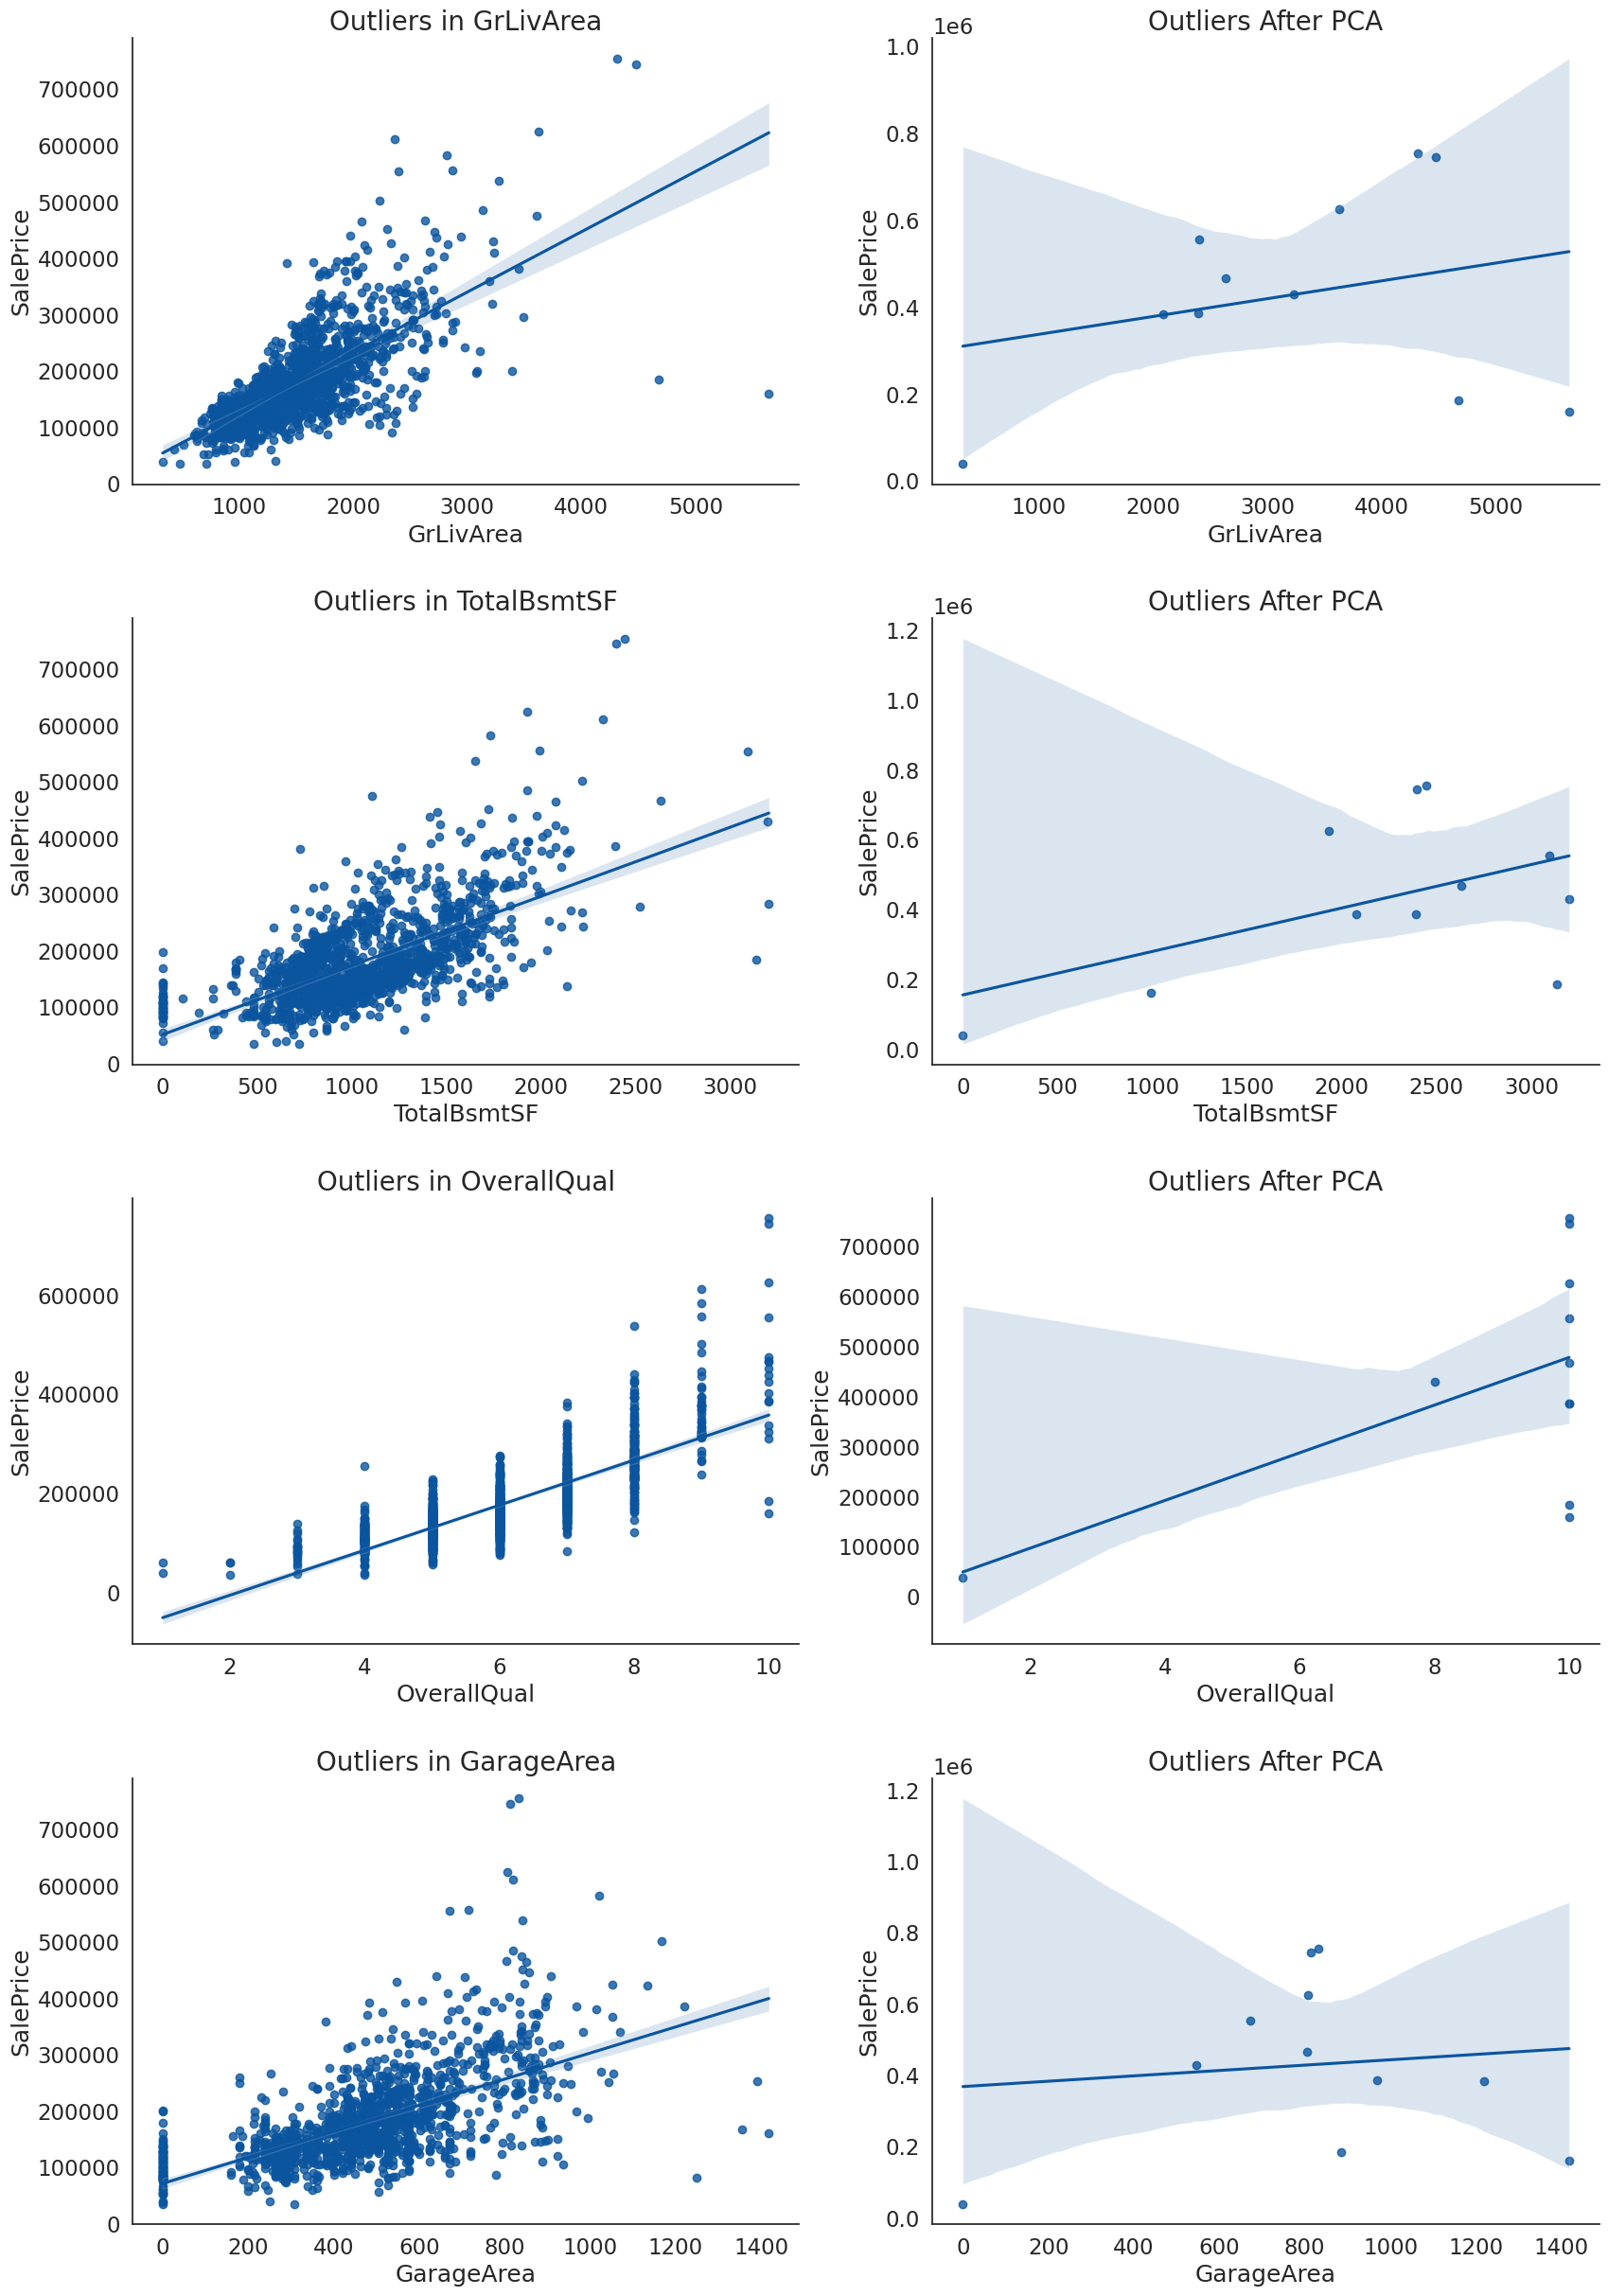

In [16]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4,2,1)
ax1 = sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
ax1.set_title('Outliers in GrLivArea',fontsize=20)
plt.subplot(4,2,2)
ax2 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GrLivArea',y='SalePrice')
ax2.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,3)
ax3 = sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
ax3.set_title('Outliers in TotalBsmtSF',fontsize=20)
plt.subplot(4,2,4)
ax4 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='TotalBsmtSF',y='SalePrice')
ax4.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,5)
ax5 = sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
ax5.set_title('Outliers in OverallQual',fontsize=20)
plt.subplot(4,2,6)
ax6 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='OverallQual',y='SalePrice')
ax6.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,7)
ax7 = sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
ax7.set_title('Outliers in GarageArea',fontsize=20)
plt.subplot(4,2,8)
ax8 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GarageArea',y='SalePrice')
ax8.set_title('Outliers After PCA',fontsize=20)
sns.despine()

In [17]:
pc2_outlier_idx = list(outlier_iqr(X_pca['PC2'])[0])
component = "PC2"

pc2_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc2 = house_df.loc[pc2_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc2.iloc[pc2_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

,SalePrice,Neighborhood,SaleCondition,GarageArea,OverallQual,TotalBsmtSF,GrLivArea
1411,140000.000000,NAmes,Normal,271.000000,6,856.000000,1668
276,201000.000000,Mitchel,Normal,573.000000,7,1560.000000,1560


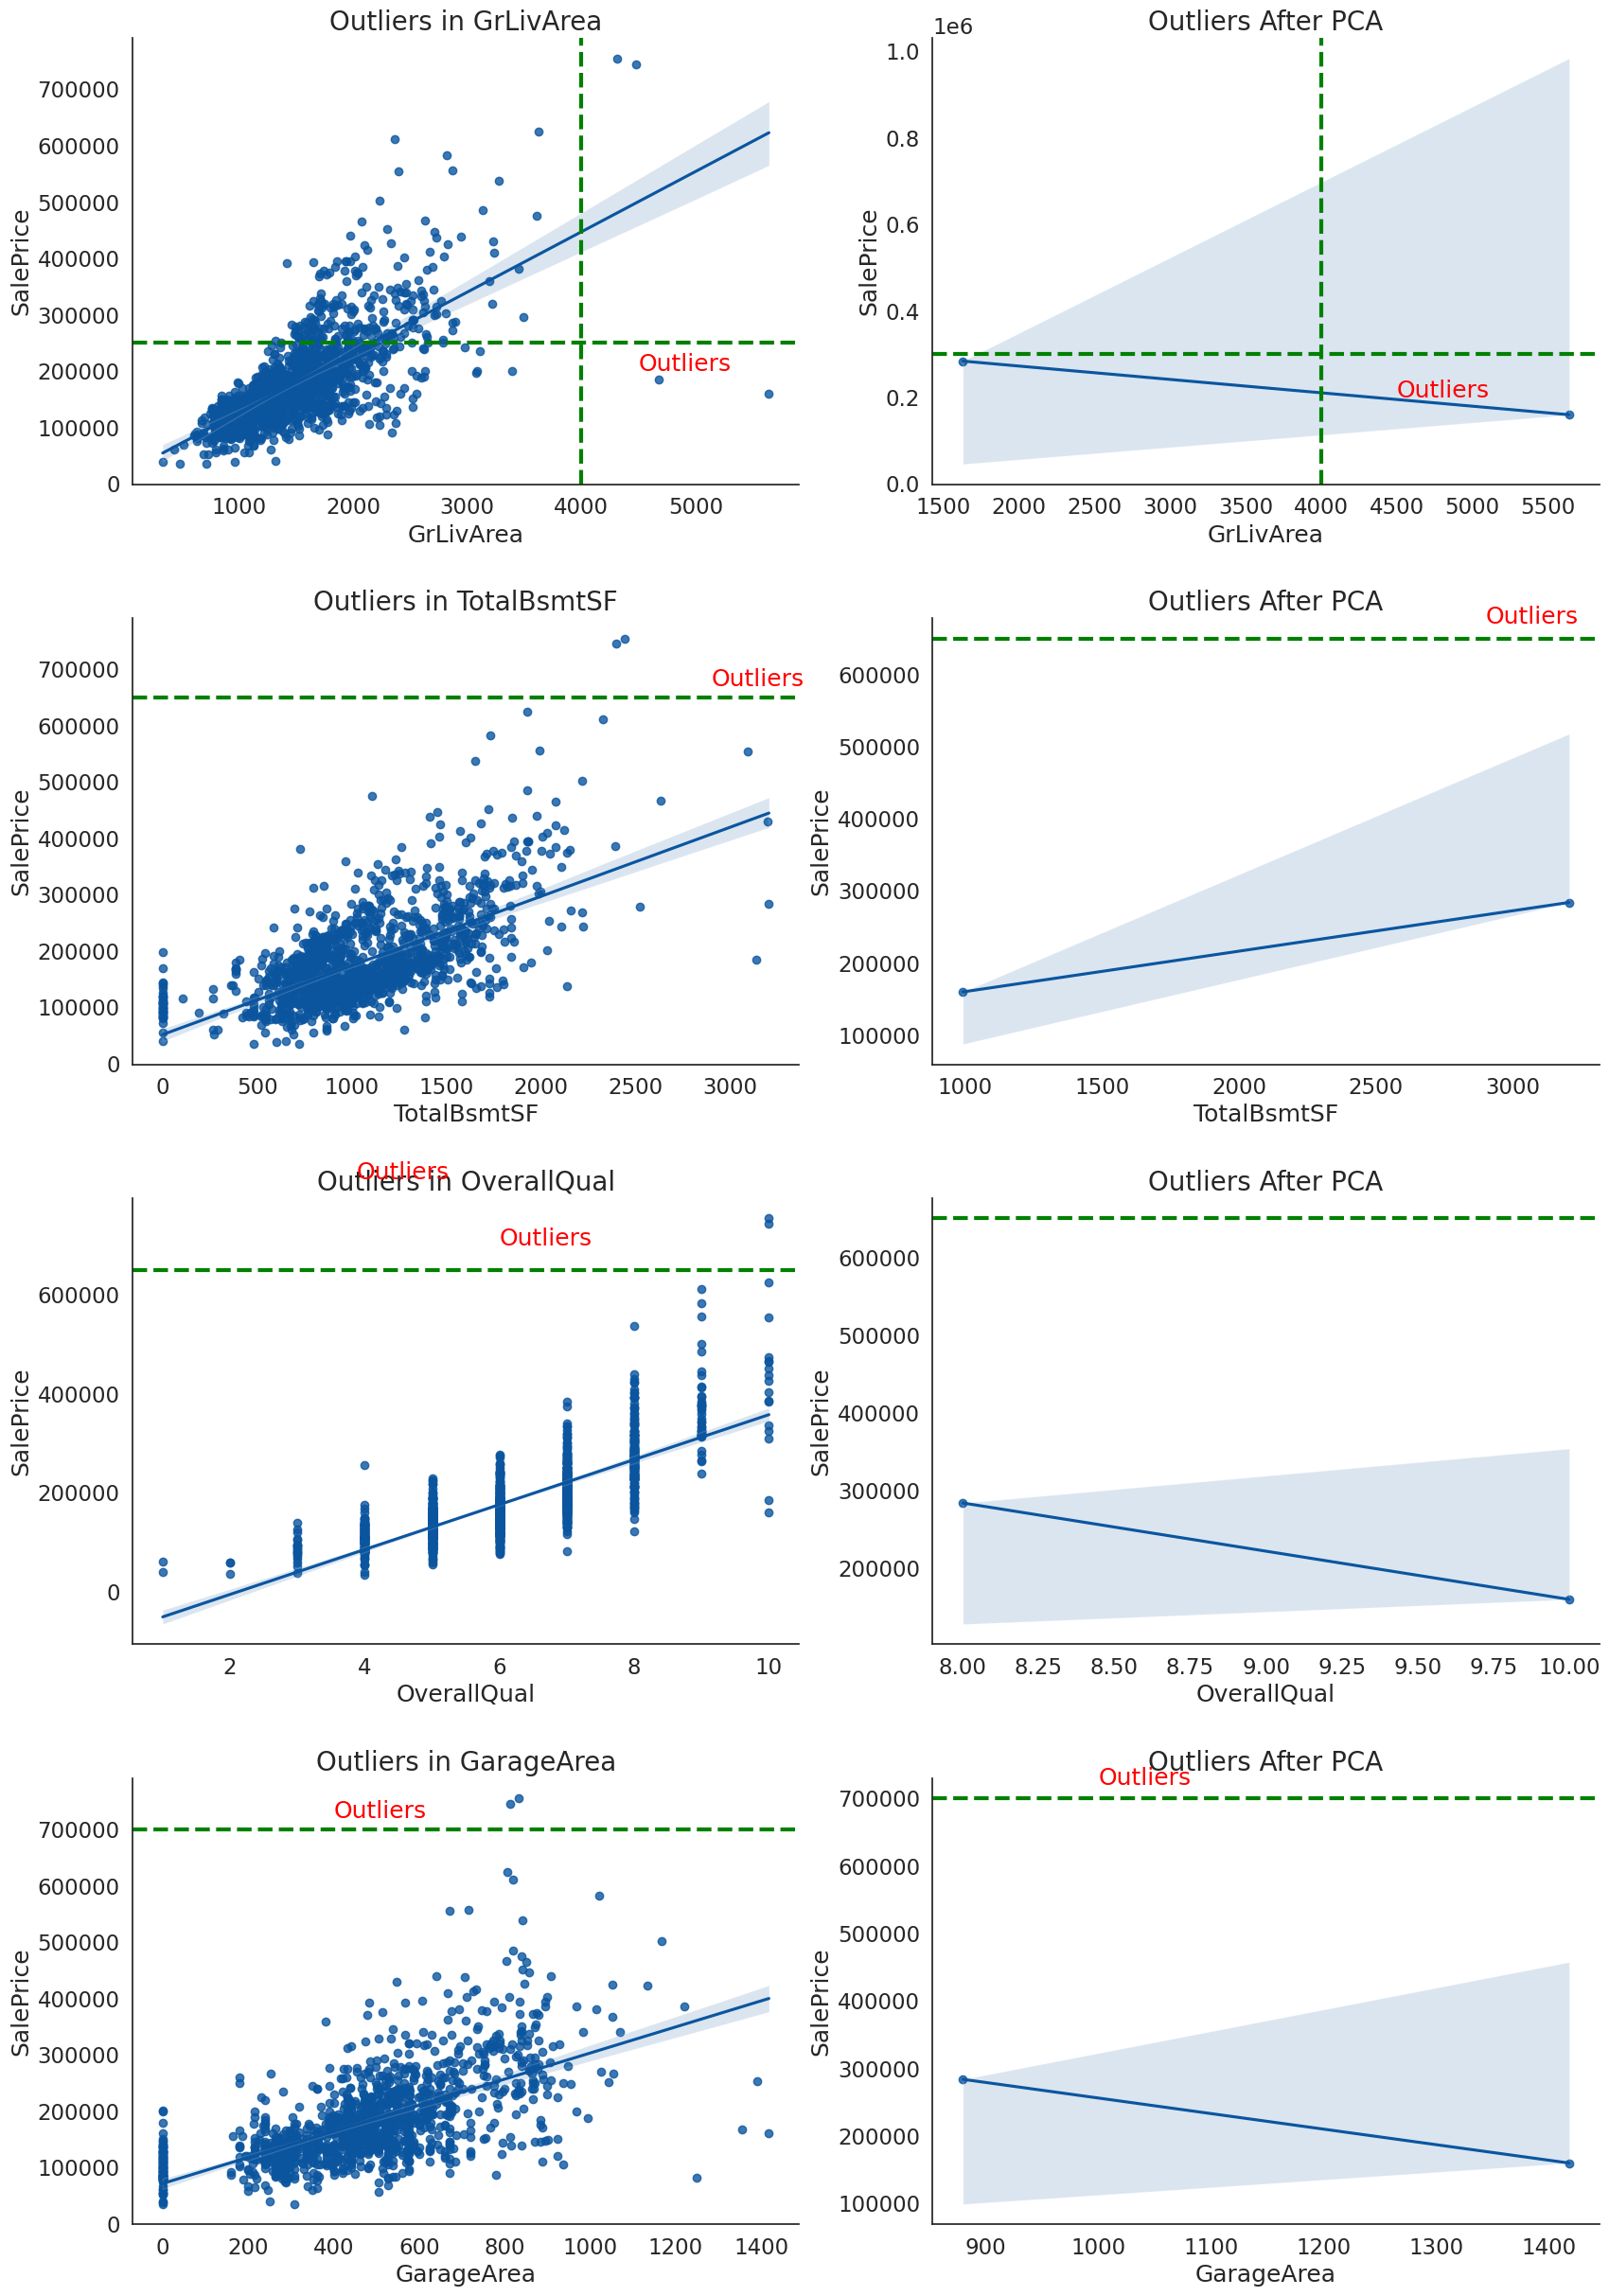

In [18]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4,2,1)
ax1 = sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
ax1.set_title('Outliers in GrLivArea',fontsize=20)
plt.axhline(y=250000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 200000, 'Outliers',color='red')
plt.subplot(4,2,2)
ax2 = sns.regplot(data=house_df.iloc[pc2_outlier_idx,:], x='GrLivArea',y='SalePrice')
ax2.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=300000, color='Green', linestyle='--', linewidth=3)
plt.axvline(x=4000, color='Green', linestyle='--', linewidth=3)
plt.text(4500, 200000, 'Outliers',color='red')
plt.subplot(4,2,3)
ax3 = sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
ax3.set_title('Outliers in TotalBsmtSF',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(2900, 670000, 'Outliers',color='red')
plt.subplot(4,2,4)
ax4 = sns.regplot(data=house_df.iloc[pc2_outlier_idx,:], x='TotalBsmtSF',y='SalePrice')
ax4.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(2900, 670000, 'Outliers',color='red')
plt.subplot(4,2,5)
ax5 = sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
ax5.set_title('Outliers in OverallQual',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(6, 700000, 'Outliers',color='red')
plt.subplot(4,2,6)
ax6 = sns.regplot(data=house_df.iloc[pc2_outlier_idx,:], x='OverallQual',y='SalePrice')
ax6.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=650000, color='Green', linestyle='--', linewidth=3)
plt.text(6, 700000, 'Outliers',color='red')
plt.subplot(4,2,7)
ax7 = sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
ax7.set_title('Outliers in GarageArea',fontsize=20)
plt.axhline(y=700000, color='Green', linestyle='--', linewidth=3)
plt.text(400, 720000, 'Outliers',color='red')
plt.subplot(4,2,8)
ax8 = sns.regplot(data=house_df.iloc[pc2_outlier_idx,:], x='GarageArea',y='SalePrice')
ax8.set_title('Outliers After PCA',fontsize=20)
plt.axhline(y=700000, color='Green', linestyle='--', linewidth=3)
plt.text(1000, 720000, 'Outliers',color='red')
sns.despine()

In [19]:
house_df.drop(pc1_outlier_idx,axis=0,inplace=True,errors='ignore')
house_df.drop(pc2_outlier_idx,axis=0,inplace=True,errors='ignore')

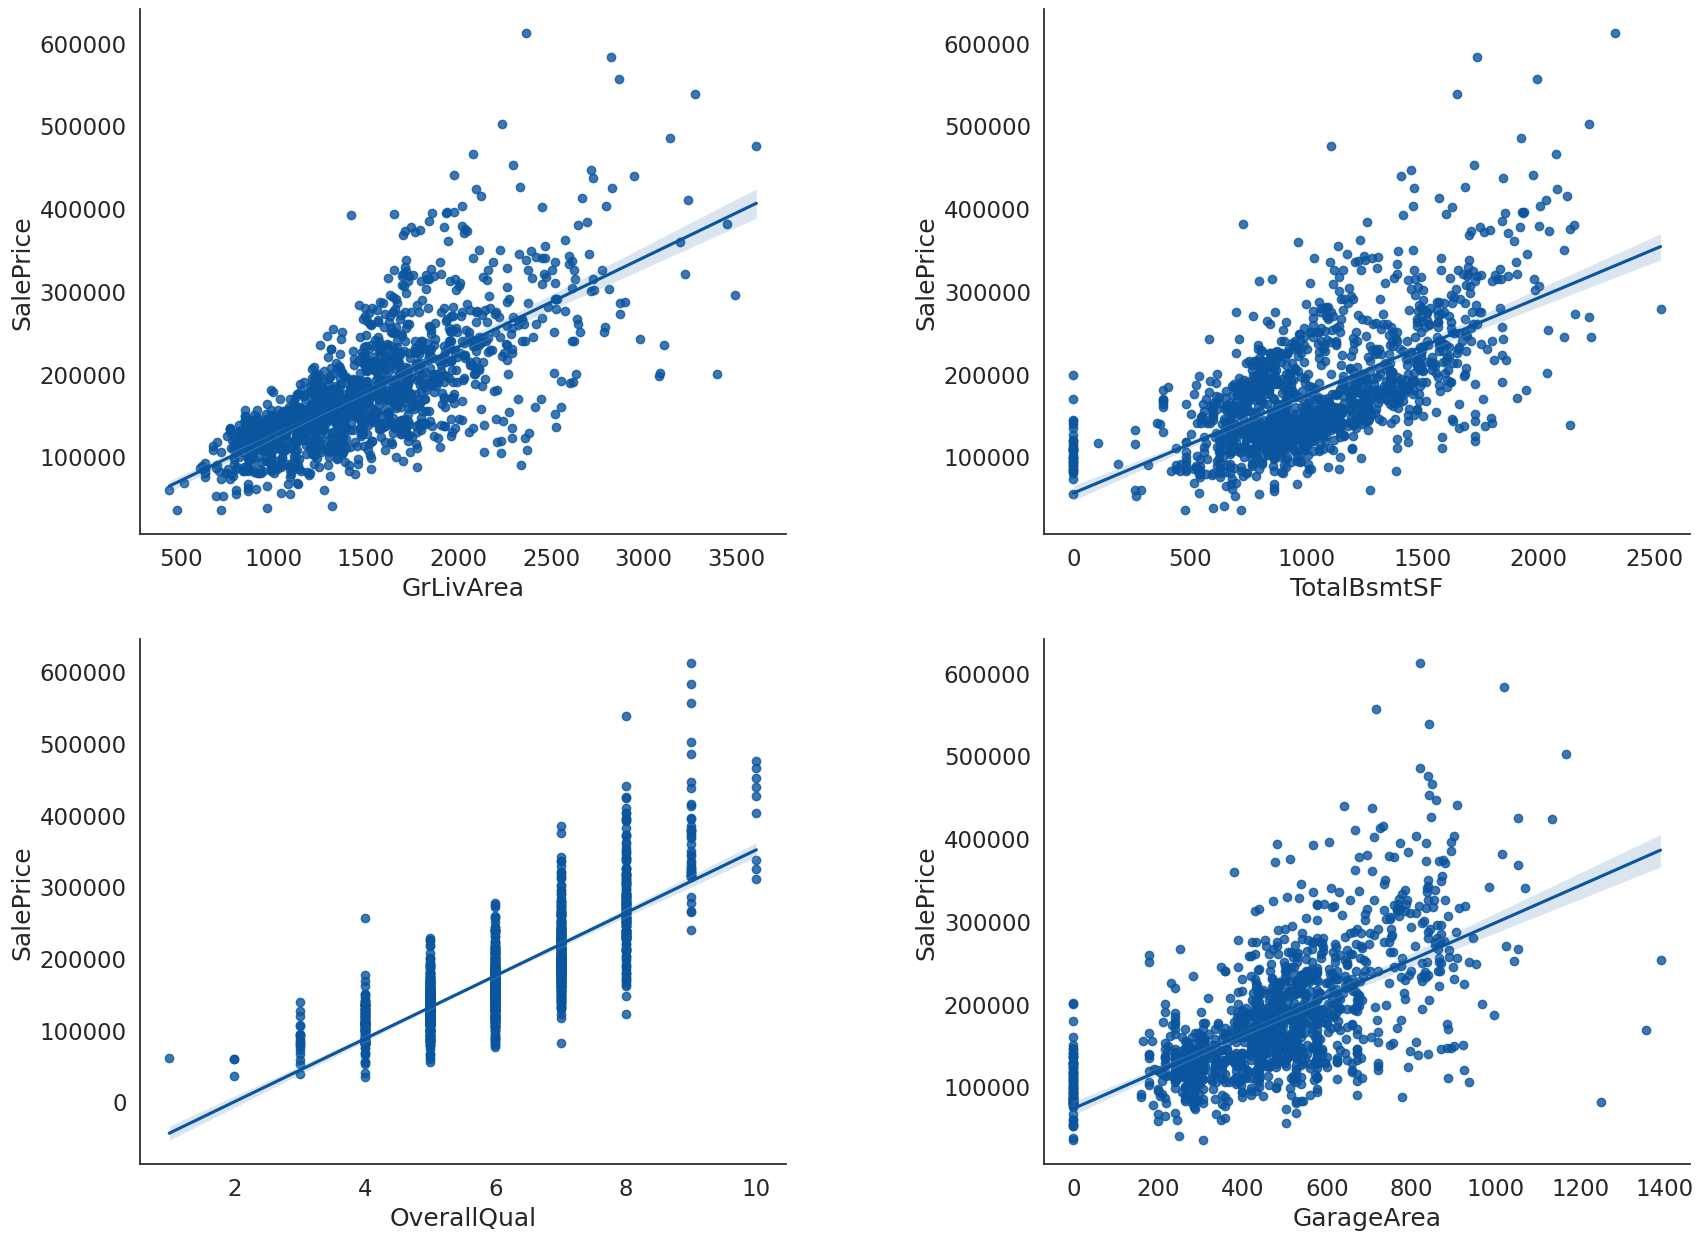

In [20]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.subplot(2,2,1)
sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
plt.subplot(2,2,2)
sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
plt.subplot(2,2,3)
sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
plt.subplot(2,2,4)
sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
sns.despine()

# **스케일링**

In [21]:
numerical_features = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  38


In [22]:
# 왜도 첨도 확인!
# 왜도 1이상, 첨도 3이상이면 로그변환 필요! (딘, 무조건 필요한 건 아님)

for col in numerical_features:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(house_df[col].skew()) ,
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house_df[col].kurt())
         )

Id              Skewness: -0.01     Kurtosis: -01.20
MSSubClass      Skewness: 01.37     Kurtosis: 001.44
LotFrontage     Skewness: 00.75     Kurtosis: 003.59
LotArea         Skewness: 13.19     Kurtosis: 277.65
OverallQual     Skewness: 00.18     Kurtosis: -00.01
OverallCond     Skewness: 00.57     Kurtosis: 001.47
YearBuilt       Skewness: -0.60     Kurtosis: -00.51
YearRemodAdd    Skewness: -0.45     Kurtosis: -01.35
MasVnrArea      Skewness: 02.55     Kurtosis: 008.97
BsmtFinSF1      Skewness: 00.83     Kurtosis: 000.11
BsmtFinSF2      Skewness: 04.16     Kurtosis: 018.97
BsmtUnfSF       Skewness: 00.91     Kurtosis: 000.35
TotalBsmtSF     Skewness: 00.28     Kurtosis: 000.75
1stFlrSF        Skewness: 00.89     Kurtosis: 001.42
2ndFlrSF        Skewness: 00.83     Kurtosis: -00.55
LowQualFinSF    Skewness: 10.77     Kurtosis: 122.30
GrLivArea       Skewness: 00.97     Kurtosis: 001.86
BsmtFullBath    Skewness: 00.63     Kurtosis: -00.74
BsmtHalfBath    Skewness: 03.94     Kurtosis: 

In [23]:
house_df["LotArea"] = np.log1p(house_df["LotArea"])
house_df["LowQualFinSF"] = np.log1p(house_df["LowQualFinSF"])
house_df["PoolArea"] = np.log1p(house_df["PoolArea"])
house_df["3SsnPorch"] = np.log1p(house_df["3SsnPorch"])
house_df["MiscVal"] = np.log1p(house_df["MiscVal"])

In [24]:
# 지수변환
house_df['TotalBsmtSF'] = house_df['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
house_df['2ndFlrSF'] = house_df['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
house_df['GarageArea'] = house_df['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
house_df['GarageCars'] = house_df['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
house_df['LotFrontage'] = house_df['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
house_df['MasVnrArea'] = house_df['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
house_df['BsmtFinSF1'] = house_df['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

In [25]:
numerical_features_log = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_log))

Number of numerical variables:  38


In [25]:
# 왜도 첨도 확인!
# 왜도 1이상, 첨도 3이상이면 로그변환 필요! (딘, 무조건 필요한 건 아님)

for col in numerical_features:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(house_df[col].skew()) ,
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house_df[col].kurt())
         )

Id              Skewness: -0.01     Kurtosis: -01.20
MSSubClass      Skewness: 01.37     Kurtosis: 001.44
LotFrontage     Skewness: 00.75     Kurtosis: 003.59
LotArea         Skewness: -0.54     Kurtosis: 003.77
OverallQual     Skewness: 00.18     Kurtosis: -00.01
OverallCond     Skewness: 00.57     Kurtosis: 001.47
YearBuilt       Skewness: -0.60     Kurtosis: -00.51
YearRemodAdd    Skewness: -0.45     Kurtosis: -01.35
MasVnrArea      Skewness: 03.02     Kurtosis: 012.47
BsmtFinSF1      Skewness: 00.76     Kurtosis: 002.00
BsmtFinSF2      Skewness: 04.16     Kurtosis: 018.97
BsmtUnfSF       Skewness: 00.91     Kurtosis: 000.35
TotalBsmtSF     Skewness: 00.64     Kurtosis: 000.45
1stFlrSF        Skewness: 00.89     Kurtosis: 001.42
2ndFlrSF        Skewness: 01.83     Kurtosis: 006.16
LowQualFinSF    Skewness: 08.64     Kurtosis: 073.67
GrLivArea       Skewness: 00.97     Kurtosis: 001.86
BsmtFullBath    Skewness: 00.63     Kurtosis: -00.74
BsmtHalfBath    Skewness: 03.94     Kurtosis: 

In [26]:
house_df["SalePrice"] = np.log1p(house_df["SalePrice"])

# **변수선택**

## **인코딩 필요없는 수치형 변수들**

In [27]:
house_df['TotalSF'] = (house_df['BsmtFinSF1'] + house_df['BsmtFinSF2'] +
                       house_df['1stFlrSF'] + house_df['2ndFlrSF'])
house_df['TotalBathrooms'] = (house_df['FullBath'] +
                              (0.5 * house_df['HalfBath']) +
                              house_df['BsmtFullBath'] +
                              (0.5 * house_df['BsmtHalfBath']))

house_df['TotalPorchSF'] = (house_df['OpenPorchSF'] + house_df['3SsnPorch'] +
                            house_df['EnclosedPorch'] +
                            house_df['ScreenPorch'] + house_df['WoodDeckSF'])

house_df['YearBlRm'] = (house_df['YearBuilt'] + house_df['YearRemodAdd'])

# Merging quality and conditions.

house_df['TotalExtQual'] = (house_df['ExterQual'] + house_df['ExterCond'])
house_df['TotalBsmQual'] = (house_df['BsmtQual'] + house_df['BsmtCond'] +
                            house_df['BsmtFinType1'] +
                            house_df['BsmtFinType2'])
house_df['TotalGrgQual'] = (house_df['GarageQual'] + house_df['GarageCond'])


In [28]:
house_df['YrBltAndRemod']=house_df['YearBuilt']+house_df['YearRemodAdd']

house_df['Total_sqr_footage'] = (house_df['BsmtFinSF1'] + house_df['BsmtFinSF2'] +
                                 house_df['1stFlrSF'] + house_df['2ndFlrSF'])

In [29]:
# simplified house_df
# house_df['haspool'] = house_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# house_df['has2ndfloor'] = house_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# house_df['hasgarage'] = house_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# house_df['hasbsmt'] = house_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_df['hasfireplace'] = house_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [30]:
# house_df['BsmtFinType1_Unf'] = 1*(house_df['BsmtFinType1'] == 'Unf') -> 오류 생김... 중복된대 ㅠ
house_df['HasWoodDeck'] = (house_df['WoodDeckSF'] == 0) * 1
house_df['HasOpenPorch'] = (house_df['OpenPorchSF'] == 0) * 1
house_df['HasEnclosedPorch'] = (house_df['EnclosedPorch'] == 0) * 1
house_df['Has3SsnPorch'] = (house_df['3SsnPorch'] == 0) * 1
house_df['HasScreenPorch'] = (house_df['ScreenPorch'] == 0) * 1
house_df['YearsSinceRemodel'] = house_df['YrSold'].astype(int) - house_df['YearRemodAdd'].astype(int)
house_df['Total_Home_Quality'] = house_df['OverallQual'] + house_df['OverallCond']
house_df['Total_SF'] = house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']

In [31]:
numerical_features2 = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features2))

Number of numerical variables:  53


In [32]:
#수치형 변수들과 SalePrice의 상관계수 확인!
house_df.select_dtypes(exclude = 'object').corr()['SalePrice'].sort_values(ascending = False)

SalePrice             1.000000
OverallQual           0.812618
Total_SF              0.725976
GrLivArea             0.710904
Total_sqr_footage     0.682198
TotalSF               0.682198
GarageCars            0.675802
TotalBathrooms        0.669626
YearBlRm              0.647848
YrBltAndRemod         0.647848
TotalBsmtSF           0.635426
Total_Home_Quality    0.631427
GarageArea            0.601925
1stFlrSF              0.600345
YearBuilt             0.588595
FullBath              0.586996
YearRemodAdd          0.568060
TotRmsAbvGrd          0.524211
hasfireplace          0.508272
GarageYrBlt           0.497865
Fireplaces            0.483104
2ndFlrSF              0.456901
LotArea               0.393514
MasVnrArea            0.391529
TotalPorchSF          0.383219
BsmtFinSF1            0.362163
LotFrontage           0.341975
OpenPorchSF           0.326423
WoodDeckSF            0.325668
HalfBath              0.317010
BsmtFullBath          0.231887
HasEnclosedPorch      0.224718
BsmtUnfS

In [ ]:
# 왜도 첨도 다시 확인!

for col in numerical_features2:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(house_df[col].skew()) ,
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house_df[col].kurt())
         )

Id              Skewness: -0.01     Kurtosis: -01.20
MSSubClass      Skewness: 01.37     Kurtosis: 001.44
LotFrontage     Skewness: 00.58     Kurtosis: 002.98
LotArea         Skewness: -0.54     Kurtosis: 003.77
OverallQual     Skewness: 00.18     Kurtosis: -00.01
OverallCond     Skewness: 00.57     Kurtosis: 001.47
YearBuilt       Skewness: -0.60     Kurtosis: -00.51
YearRemodAdd    Skewness: -0.45     Kurtosis: -01.35
MasVnrArea      Skewness: 03.02     Kurtosis: 012.47
BsmtFinSF1      Skewness: 00.76     Kurtosis: 002.00
BsmtFinSF2      Skewness: 04.16     Kurtosis: 018.97
BsmtUnfSF       Skewness: 00.91     Kurtosis: 000.35
TotalBsmtSF     Skewness: 00.64     Kurtosis: 000.45
1stFlrSF        Skewness: 00.89     Kurtosis: 001.42
2ndFlrSF        Skewness: 01.83     Kurtosis: 006.16
LowQualFinSF    Skewness: 08.64     Kurtosis: 073.67
GrLivArea       Skewness: 00.97     Kurtosis: 001.86
BsmtFullBath    Skewness: 00.63     Kurtosis: -00.74
BsmtHalfBath    Skewness: 03.94     Kurtosis: 

# **인코딩**

In [33]:
house_df = house_df.drop(columns=['Id'])

In [ ]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,TotalPorchSF,YearBlRm,TotalExtQual,TotalBsmQual,TotalGrgQual,YrBltAndRemod,Total_sqr_footage,hasfireplace,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,YearsSinceRemodel,Total_Home_Quality,Total_SF
0,60,RL,65.0,9.042040,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000000,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854.000000,0.0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.000000,TA,TA,Y,0,61,0,0.0,0,0.0,0.000000,2,2008,WD,Normal,12.247699,2416.000000,3.5,61.0,4006,GdTA,GdTAGLQUnf,TATA,4006,2416.000000,0,1,0,1,1,1,5,12,2566.000000
1,20,RL,80.0,9.169623,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,54.59815,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000000,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,665.141633,0.0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.000000,TA,TA,Y,298,0,0,0.0,0,0.0,0.000000,5,2007,WD,Normal,12.109016,2905.141633,2.5,298.0,3952,TATA,GdTAALQUnf,TATA,3952,2905.141633,1,0,1,1,1,1,31,14,3189.141633
2,60,RL,68.0,9.328212,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000000,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866.000000,0.0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.000000,TA,TA,Y,0,42,0,0.0,0,0.0,0.000000,9,2008,WD,Normal,12.317171,2272.000000,3.5,42.0,4003,GdTA,GdTAGLQUnf,TATA,4003,2272.000000,1,1,0,1,1,1,6,12,2706.000000
3,70,RL,60.0,9.164401,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,54.59815,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000000,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756.000000,0.0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.000000,TA,TA,Y,0,35,272,0.0,0,0.0,0.000000,2,2006,WD,Abnorml,11.849405,1933.000000,2.0,307.0,3885,TATA,TAGdALQUnf,TATA,3885,1933.000000,1,1,0,0,1,1,36,12,2473.000000
4,60,RL,84.0,9.565284,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000000,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053.000000,0.0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.000000,TA,TA,Y,192,84,0,0.0,0,0.0,0.000000,12,2008,WD,Normal,12.429220,2853.000000,3.5,276.0,4000,GdTA,GdTAGLQUnf,TATA,4000,2853.000000,1,0,0,1,1,1,8,13,3343.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,7.568896,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,54.59815,TA,TA,CBlock,TA,TA,No,Unf,665.141633,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546.000000,0.0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,403.428793,None,None,Y,0,0,0,0.0,0,0.0,0.000000,6,2006,WD,N

## **더미 변수**

In [34]:
house_df = pd.get_dummies(house_df, drop_first=True)

In [33]:
print('\n 전체 피처의 타입\n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\n Null columns and count:\n', isnull_series[isnull_series>0].sort_values(ascending=False))


 전체 피처의 타입
 bool       344
int64       29
float64     23
Name: count, dtype: int64

 Null columns and count:
 SalePrice    1459
dtype: int64


# **모델링**

In [35]:
y = house_df[tr_idx].pop('SalePrice')
X = house_df[tr_idx].drop('SalePrice',axis=1,errors='ignore')
X_sub = house_df[~tr_idx].drop('SalePrice',axis=1,errors='ignore')
print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

# X_sub 은 Saleprice 를 포함해야 하는 것 같음! (test 의 모든 것을 나타내는 변수래!!)

X (1448, 395) y (1448,) X_sub (1459, 395)


In [35]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [ ]:
print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

X (1448, 411) y (1448,) X_sub (1459, 411)


In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNetCV

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)


# setup models
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1000, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1000, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =42)
lightgbm = LGBMRegressor(objective='regression',
                                       num_leaves=4,
                                       learning_rate=0.01,
                                       n_estimators=5000,
                                       max_bin=200,
                                       bagging_fraction=0.75,
                                       bagging_freq=5,
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )


xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                                            reg_alpha=0.00006)

# stack
estimators = [
    ('ridge', RidgeCV()),
    ('lasso', LassoCV()),
    ('elasticnet', ElasticNetCV()),
    ('gbr', GradientBoostingRegressor()),
    ('xgboost', XGBRegressor()),
    ('lightgbm', LGBMRegressor())
]

meta_regressor = XGBRegressor()

stack_gen = StackingRegressor(estimators=estimators, final_estimator=meta_regressor, cv=5, passthrough=True)

In [43]:
print('START Fit')
print('StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print('lasso')
lasso_model_full_data = lasso.fit(X, y)
print('ridge')
ridge_model_full_data = ridge.fit(X, y)
print('svr')
svr_model_full_data = svr.fit(X, y)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
StackingCVRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4915
[LightGBM] [Info] Number of data points in the train set: 1448, number of used features: 192
[LightGBM] [Info] Start training from score 12.018302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4669
[LightGBM] [Info] Number of data points in the train set: 1158, number of used features: 180
[LightGBM] [Info] Start training from score 12.014738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_row_wise=true` to remove the over

In [44]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.05981160789427113


In [45]:
sample_submission_df.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

sample_submission_df

,Id,SalePrice
0,1461,121961.0
1,1462,159448.0
2,1463,184136.0
3,1464,194241.0
4,1465,187062.0
...,...,...
1454,2915,87152.0
1455,2916,83349.0
1456,2917,169831.0
1457,2918,121070.0


In [46]:
# Brutal approach to deal with predictions close to outer range
q1 = sample_submission_df['SalePrice'].quantile(0.0045)
q2 = sample_submission_df['SalePrice'].quantile(0.99)

sample_submission_df['SalePrice'] = sample_submission_df['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
sample_submission_df['SalePrice'] = sample_submission_df['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

sample_submission_df.to_csv("origin_submission.csv", index=False)
